In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


DATA PREPROCESSING


In [ ]:
df.shape

(200, 5)

In [ ]:
#Let us check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There are no null values.

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#let us remove unnamed column
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X=df.drop(columns="Sales",axis=1)
y=df["Sales"]

DATA VISUALIZATION


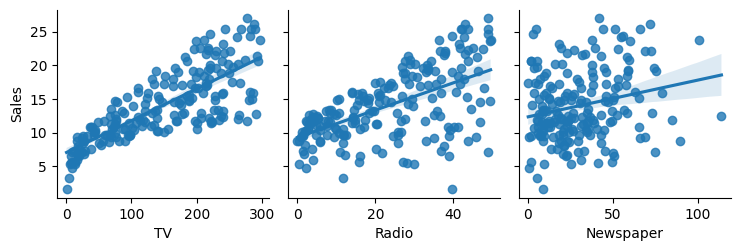

In [ ]:
#Check the realtionship between features and target
sns.pairplot(data=df, x_vars=['TV','Radio', 'Newspaper'], y_vars=['Sales'], kind='reg')

<Axes: ylabel='Newspaper'>

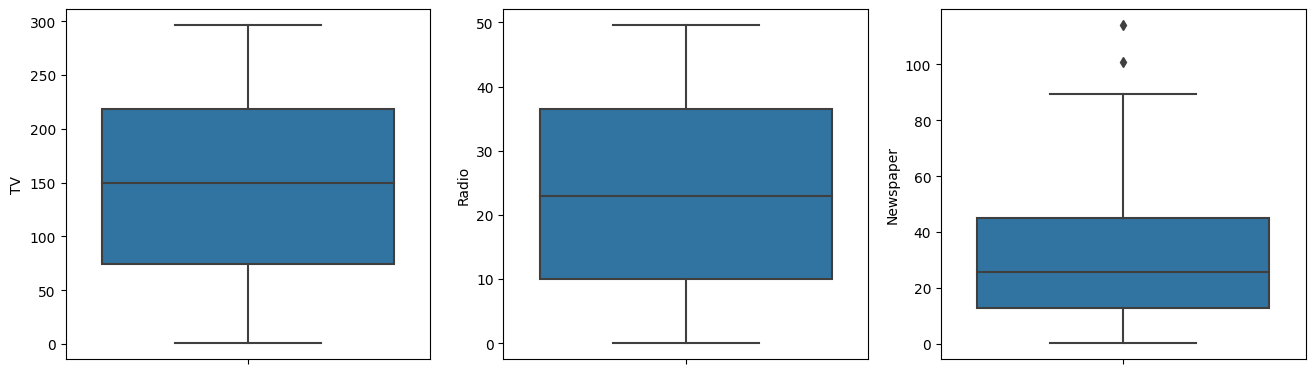

In [ ]:
#Boxplot

plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='TV')

plt.subplot(2,3,2)
sns.boxplot(data=df,y='Radio')

plt.subplot(2,3,3)
sns.boxplot(data=df,y='Newspaper')

SPLITTING THE TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)
lin_error=mean_squared_error(y_test,y_pred)
print("The Error rate is: ",lin_error)

lin_accuracy=r2_score(y_test,y_pred)
print("The accuracy in linear regression model is: ",lin_accuracy)

The Error rate is:  3.1740973539761033
The accuracy in linear regression model is:  0.899438024100912


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
seed_value=42
dtree=DecisionTreeRegressor(random_state=seed_value)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_accuracy=r2_score(y_test,dtree_ypred)
dtree_error=mean_squared_error(y_test,y_pred)

print("The Error rate is: ",dtree_error)
print("The Decision Tree accuracy is: ",dtree_accuracy)



The Error rate is:  3.1740973539761033
The Decison Tree accuracy is:  0.9310914968293178


In [ ]:
#SVM
from sklearn.svm import SVR
svm_classifier=SVR()

svm_classifier.fit(x_train,y_train)
svm_ypred=svm_classifier.predict(x_test)

svm_error=mean_squared_error(y_test,svm_ypred)
svm_accuracy=r2_score(y_test,svm_ypred)

print("The Error rate is: ",svm_error)
print("The SVM accuracy is: ",svm_accuracy)


The Error rate is:  4.00604540443217
The Decison Tree accuracy is:  0.873080187377834


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
reger=RandomForestRegressor()
reger.fit(x_train,y_train)
reger_ypred=reger.predict(x_test)
reger_error=mean_squared_error(reger_ypred,y_test)
reger_accuracy=r2_score(reger_ypred,y_test)

print("The Error rate is: ",reger_error)
print("The Random Forest Tree accuracy is: ",reger_accuracy)

The Error rate is:  0.5211890249999981
The Decison Tree accuracy is:  0.9825733582251374


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(x_train,y_train)
knn_ypred=knn_regressor.predict(x_test)

knn_error=mean_squared_error(knn_ypred,y_test)
knn_accuracy=r2_score(knn_ypred,y_test)

print("The Error rate is: ",knn_error)
print("The KNN accuracy is: ",knn_accuracy)

The Error rate is:  3.0235277777777774
The Decison Tree accuracy is:  0.9087584189129186


So, the sales prediction is done with the help of models such as SVM(Support Vector Machine),Linear Regression, Random Forest, Decision Tree, KNN(KNeighbor Regressor)